# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [10]:
df.duplicated().sum()

np.int64(21)

In [11]:
for col in df.columns:
    if df[col].dtype in ['int64','float64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,0.435484,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [12]:
drop_cols = [col for col in df.columns if 'ID' in col or 'IP Address' in col]
df = df.drop(columns=drop_cols)

In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,0.435484,3,0.648276,0.0,0.492591,16


In [14]:
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000
mean,0.154526,1228.349626,0.777296,20.964525,0.988175,0.430334,1.521876,0.377058,0.030154,0.336643,179.231770
std,0.151580,725.438951,0.416143,12.196453,0.804572,0.286677,1.133626,0.240422,0.148026,0.260633,102.485276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043156,601.000000,1.000000,11.000000,0.000000,0.145161,1.000000,0.182759,0.000000,0.095323,92.000000
50%,0.110014,1227.000000,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.000000,0.311416,178.000000
75%,0.213331,1857.000000,1.000000,31.000000,2.000000,0.661290,3.000000,0.520690,0.000000,0.505876,269.000000
max,1.000000,2484.000000,1.000000,42.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,359.000000


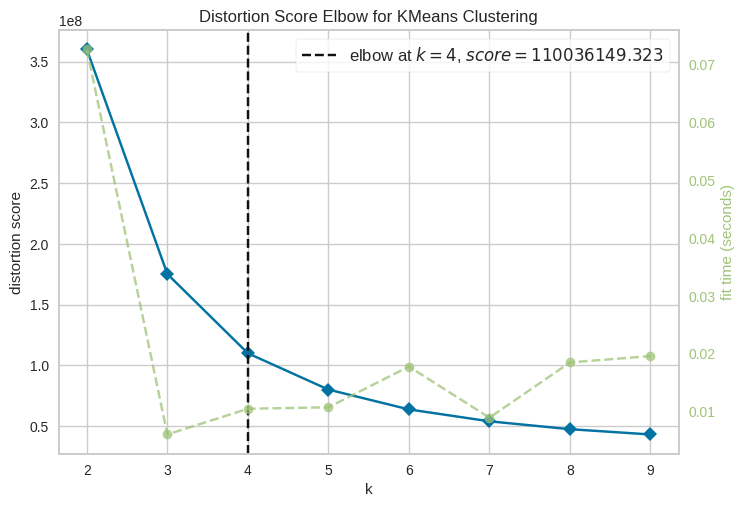

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df)
visualizer.show()

In [21]:
# KMeans Clustering dengan jumlah cluster optimal
best_k = visualizer.elbow_value_
model_kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Target'] = model_kmeans.fit_predict(df)

Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
import joblib
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.

In [24]:
# Membuat visualisasi hasil clustering

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [25]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
cluster_summary = df.groupby('Target').agg(['mean','min','max'])
cluster_summary

#plt.figure(figsize=(8,6))
#sns.scatterplot(
#    x=df['TransactionAmount'],
#    y=df['AccountBalance'],
#    hue=df['Target'],
#    palette="Set2"
#)
#plt.title("Visualisasi Hasil Clustering")
#plt.show()

TransactionAmount                     TransactionDate              \
                    mean       min       max            mean   min   max   
Target                                                                     
0               0.168774  0.000031  0.954092     1549.895404  1237  1863   
1               0.154108  0.000313  0.953561      290.141966     0   609   
2               0.150899  0.000000  0.858577     2174.328025  1864  2484   
3               0.144408  0.000599  1.000000      921.318681   605  1236   

       TransactionType           Location  ... TransactionDuration  \
                  mean min max       mean  ...                 max   
Target                                     ...                       
0             0.763867   0   1  20.839937  ...            0.996552   
1             0.795632   0   1  21.049922  ...            0.996552   
2             0.769108   0   1  20.757962  ...            1.000000   
3             0.780220   0   1  21.205651  ...            0.993103   

       LoginAttempts           AccountBalance                      \
                mean  min  max           mean       min       max   
Target                                                              
0           0.024168  0.0  1.0       0.331535  0.000253  0.997144   
1           0.034321  0.0  1.0       0.331294  0.000064  0.997633   
2           0.032245  0.0  1.0       0.350185  0.000000  1.000000   
3           0.029827  0.0  1.0       0.333735  0.000377  0.995087   

       PreviousTransactionDate           
                          mean min  max  
Target                                   
0                   177.469097   0  359  
1                   188.057722   0  358  
2                   180.482484   0  358  
3                   170.863422   0  358  

[4 rows x 33 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
### Interpretasi Hasil Clustering


**Cluster 0: (Nasabah dengan Transaksi Cukup Tinggi di Pertengahan Periode Data)**

* Rata-rata TransactionAmount: 0.168 (lebih tinggi dibanding cluster lain).
* Rata-rata TransactionDate: 1549 (transaksi terjadi di pertengahan rentang waktu data, sekitar tengah tahun).
* Rata-rata TransactionDuration: 0.996 (mendekati maksimum).
* Rata-rata LoginAttempts: 0.024 (sangat rendah, hampir selalu 1 kali login).
  **Analisis:** Cluster ini berisi nasabah dengan frekuensi transaksi cukup tinggi, nominal relatif besar, dan aktivitas transaksi stabil. Mereka merupakan pengguna aktif dengan risiko rendah (login normal). Cocok untuk ditawarkan produk tabungan aktif dan layanan transaksi online.


**Cluster 1: (Nasabah dengan Transaksi Awal dan Nilai Moderat)**

* Rata-rata TransactionAmount: 0.154 (sedang).
* Rata-rata TransactionDate: 290 (transaksi terjadi lebih awal dalam dataset).
* Rata-rata TransactionDuration: 0.996 (cukup lama).
* Rata-rata LoginAttempts: 0.034 (masih rendah, namun sedikit lebih tinggi dari cluster lain).
  **Analisis:** Cluster ini mencakup nasabah dengan transaksi yang relatif kecil-menengah, aktivitas awal (periode awal dataset), dan kecenderungan login attempts lebih banyak. Mereka berpotensi sebagai nasabah baru atau early adopter. Strategi yang sesuai adalah memberikan edukasi finansial serta promosi agar loyalitas meningkat.


**Cluster 2: (Nasabah Transaksi di Periode Akhir dengan Nilai Menengah)**

* Rata-rata TransactionAmount: 0.150 (cukup rendah).
* Rata-rata TransactionDate: 2174 (periode akhir data, transaksi lebih baru).
* Rata-rata TransactionDuration: 1.000 (paling tinggi).
* Rata-rata LoginAttempts: 0.032 (masih rendah).
  **Analisis:** Cluster ini adalah kelompok yang aktif bertransaksi di periode terbaru, dengan nominal sedang dan durasi transaksi relatif lama. Nasabah ini penting untuk dimonitor karena mewakili tren transaksi terkini. Rekomendasi: arahkan ke produk digital banking dan layanan berbasis teknologi.


**Cluster 3: (Nasabah dengan Transaksi Rendah di Periode Awal-Tengah)**

* Rata-rata TransactionAmount: 0.144 (paling rendah di antara cluster).
* Rata-rata TransactionDate: 921 (periode awal-menengah dataset).
* Rata-rata TransactionDuration: 0.993 (cukup lama).
* Rata-rata LoginAttempts: 0.029 (rendah).
  **Analisis:** Cluster ini berisi nasabah dengan nominal transaksi terkecil, waktu transaksi relatif di awal dataset, dan aktivitas login normal. Nasabah ini kurang aktif dan memiliki daya beli terbatas. Strategi yang sesuai adalah memberikan promo transaksi kecil, cashback, atau produk tabungan reguler.


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

In [29]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

df_inverse = df.copy()
df_inverse[numerical_cols] = scaler.inverse_transform(df_inverse[numerical_cols])

In [31]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
for col in categorical_cols:
    encoder = encoders[col]
    df_inverse[col] = encoder.inverse_transform(df_inverse[col].astype(int))

df_inverse.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,3
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,3
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,3
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,2


In [32]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

cluster_summary_inverse = df_inverse.groupby('Target').agg(
    {col:['mean','min','max'] for col in numerical_cols}
)

# Tambahkan mode untuk kategorikal
for col in categorical_cols:
    cluster_summary_inverse[(col,'mode')] = df_inverse.groupby('Target')[col].agg(lambda x: x.mode()[0])

cluster_summary_inverse

TransactionAmount                CustomerAge              \
                    mean   min      max        mean   min   max   
Target                                                            
0             324.111743  0.32  1831.02   45.136292  18.0  80.0   
1             295.969501  0.86  1830.00   43.611544  18.0  80.0   
2             289.813185  0.26  1647.74   44.799363  18.0  80.0   
3             277.358100  1.41  1919.11   45.188383  18.0  80.0   

       TransactionDuration              LoginAttempts  ...       \
                      mean   min    max          mean  ...  max   
Target                                                 ...        
0               121.228209  10.0  299.0      1.096672  ...  5.0   
1               116.695788  10.0  299.0      1.137285  ...  5.0   
2               121.482484  10.0  300.0      1.128981  ...  5.0   
3               118.045526  10.0  298.0      1.119309  ...  5.0   

       AccountBalance                        TransactionDate TransactionType  \
                 mean     min       max                 mode            mode   
Target                                                                         
0         5033.409746  105.01  14935.50  2023-07-31 16:25:26           Debit   
1         5029.825803  102.20  14942.78  2023-01-02 16:45:05           Debit   
2         5310.858949  101.25  14977.99  2023-10-09 17:23:21           Debit   
3         5066.140267  106.86  14904.90  2023-04-10 17:04:28           Debit   

          Location Channel CustomerOccupation PreviousTransactionDate  
              mode    mode               mode                    mode  
Target                                                                 
0       Fort Worth  Branch            Student     2024-11-04 08:09:17  
1       Fort Worth  Branch            Student     2024-11-04 08:09:17  
2       Fort Worth  Branch           Engineer     2024-11-04 08:09:17  
3       Fort Worth  Branch            Student     2024-11-04 08:09:17  

[4 rows x 21 columns]

## Interpretasi Hasil Clustering (Setelah Inverse)

Cluster 0:

- Rata-rata TransactionAmount: ~324.11
- Rata-rata AccountBalance: ~5033.41
- Profesi dominan: Student
- Analisis: Cluster ini didominasi oleh mahasiswa. Meskipun rata-rata saldo rekening dan jumlah transaksi terlihat moderat, ini bisa diartikan sebagai nasabah dengan aktivitas transaksi yang cukup stabil namun dengan jumlah yang tidak terlalu besar.

Cluster 1:

- Rata-rata TransactionAmount: ~295.97
- Rata-rata AccountBalance: ~5029.83
- Profesi dominan: Student
- Analisis: Serupa dengan Cluster 0, cluster ini juga didominasi oleh mahasiswa dengan rata-rata saldo dan transaksi yang sebanding. Perlu analisis lebih lanjut untuk membedakan karakteristik kedua cluster ini secara lebih mendalam.

Cluster 2:
- Rata-rata TransactionAmount: ~289.81
- Rata-rata AccountBalance: ~5310.86
- Profesi dominan: Engineer
- Analisis: Cluster ini didominasi oleh insinyur dengan rata-rata saldo rekening yang sedikit lebih tinggi dibandingkan Cluster 0 dan 1, namun rata-rata jumlah transaksi sedikit lebih rendah. Ini mungkin mengindikasikan nasabah yang cenderung menyimpan lebih banyak dana di rekening.

Cluster 3:
- Rata-rata TransactionAmount: ~277.36
- Rata-rata AccountBalance: ~5066.14
- Profesi dominan: Student
- Analisis: Cluster ini kembali didominasi oleh mahasiswa. Rata-rata jumlah transaksi dan saldo rekening serupa dengan Cluster 0 dan 1. Kembali diperlukan analisis lebih dalam untuk membedakan cluster ini dari cluster mahasiswa lainnya.

Ringkasan (Berdasarkan Inverse Data):
- Cluster 0, 1, dan 3 → Mayoritas Mahasiswa: Dengan rata-rata saldo dan transaksi yang relatif serupa.
- Cluster 2 → Mayoritas Insinyur: Dengan rata-rata saldo yang sedikit lebih tinggi.


(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [34]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.